# 2. Exploratory data analysis (EDA)

1. Importing packages and dataset
2. Exploration of variable correlation
3. Assessment of numeric variables versus target variables
4. Assessment of categorical variables versus target variables

### 2.1. Importing packages and dataset

In [1]:
# Import the required packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/processed/clean.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOL_TYPE':'category',
            'EQUIP_AGE':'category',
            'HEAT_TYPE':'category',
            'CLIMATE_REGION':'category',
            'OWNERSHIP':'category',
            'UNIT_TYPE':'category',
            'DECADE_BUILT':'category',
            'ATTIC':'category',
            'BASEMENT':'category',
            'HIGH_CEIL':'category',
            'THERMOSTAT':'category',
            'SIZEOFGARAGE':'category'
              }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [3]:
# Check # of columns and rows imported
df.shape

(5686, 27)

In [4]:
# Print info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 5685
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   UNIT_TYPE           5686 non-null   category
 1   CLIMATE_REGION      5686 non-null   category
 2   DECADE_BUILT        5686 non-null   category
 3   HDD65               5686 non-null   float64 
 4   CDD65               5686 non-null   float64 
 5   FLOOR_AREA          5686 non-null   float64 
 6   FLOOR_AREA_log      5686 non-null   float64 
 7   COOL_TYPE           5686 non-null   category
 8   EQUIP_AGE           5686 non-null   category
 9   HEAT_TYPE           5686 non-null   category
 10  THERMOSTAT          5686 non-null   category
 11  HIGH_CEIL           5686 non-null   category
 12  ATTIC               5686 non-null   category
 13  BASEMENT            5686 non-null   category
 14  BEDROOMS            5686 non-null   int64   
 15  BATHROOMS           5686 non-null   fl

---
### 2.2. Exploration of variable correlation

The dataset contains differenct categorical and numerical variables, besides the target variables:

- **WATERHEAT_COST_log:** Cost for water heating 
- **HEAT_COST_log:** Total cost for space heating 
- **COOL_COST_log:** Total cost for space cooling DOLELCOL_log
- **ELECT_COST_log:** Total electrical consumption excluding cooling 

In this section, we are exploring the interaction between numeric attributes and the target variables by examinating the correlation matrix and a pairplot.

Log transformed target variables are used for the analysis in lieu of the original scale variables.

In [5]:
# Exclude original target variables from the correlation analysis.

df_reduced = df.drop(['WATERHEAT_COST', 'FLOOR_AREA', 'HEAT_COST', 'ELECT_COST', 'COOL_COST'], axis=1)

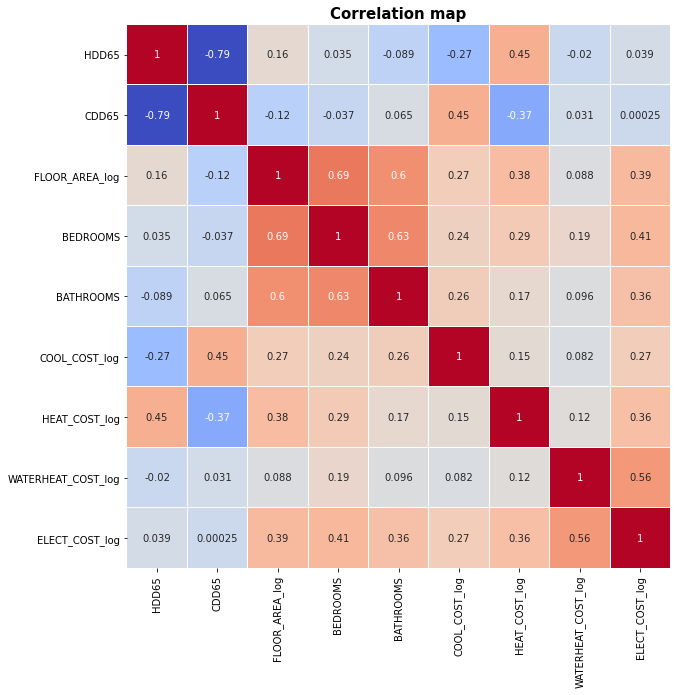

In [6]:
# Create the correlation matrix
corr_matrix = df_reduced.corr()

# Plot the correlation matrix with heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

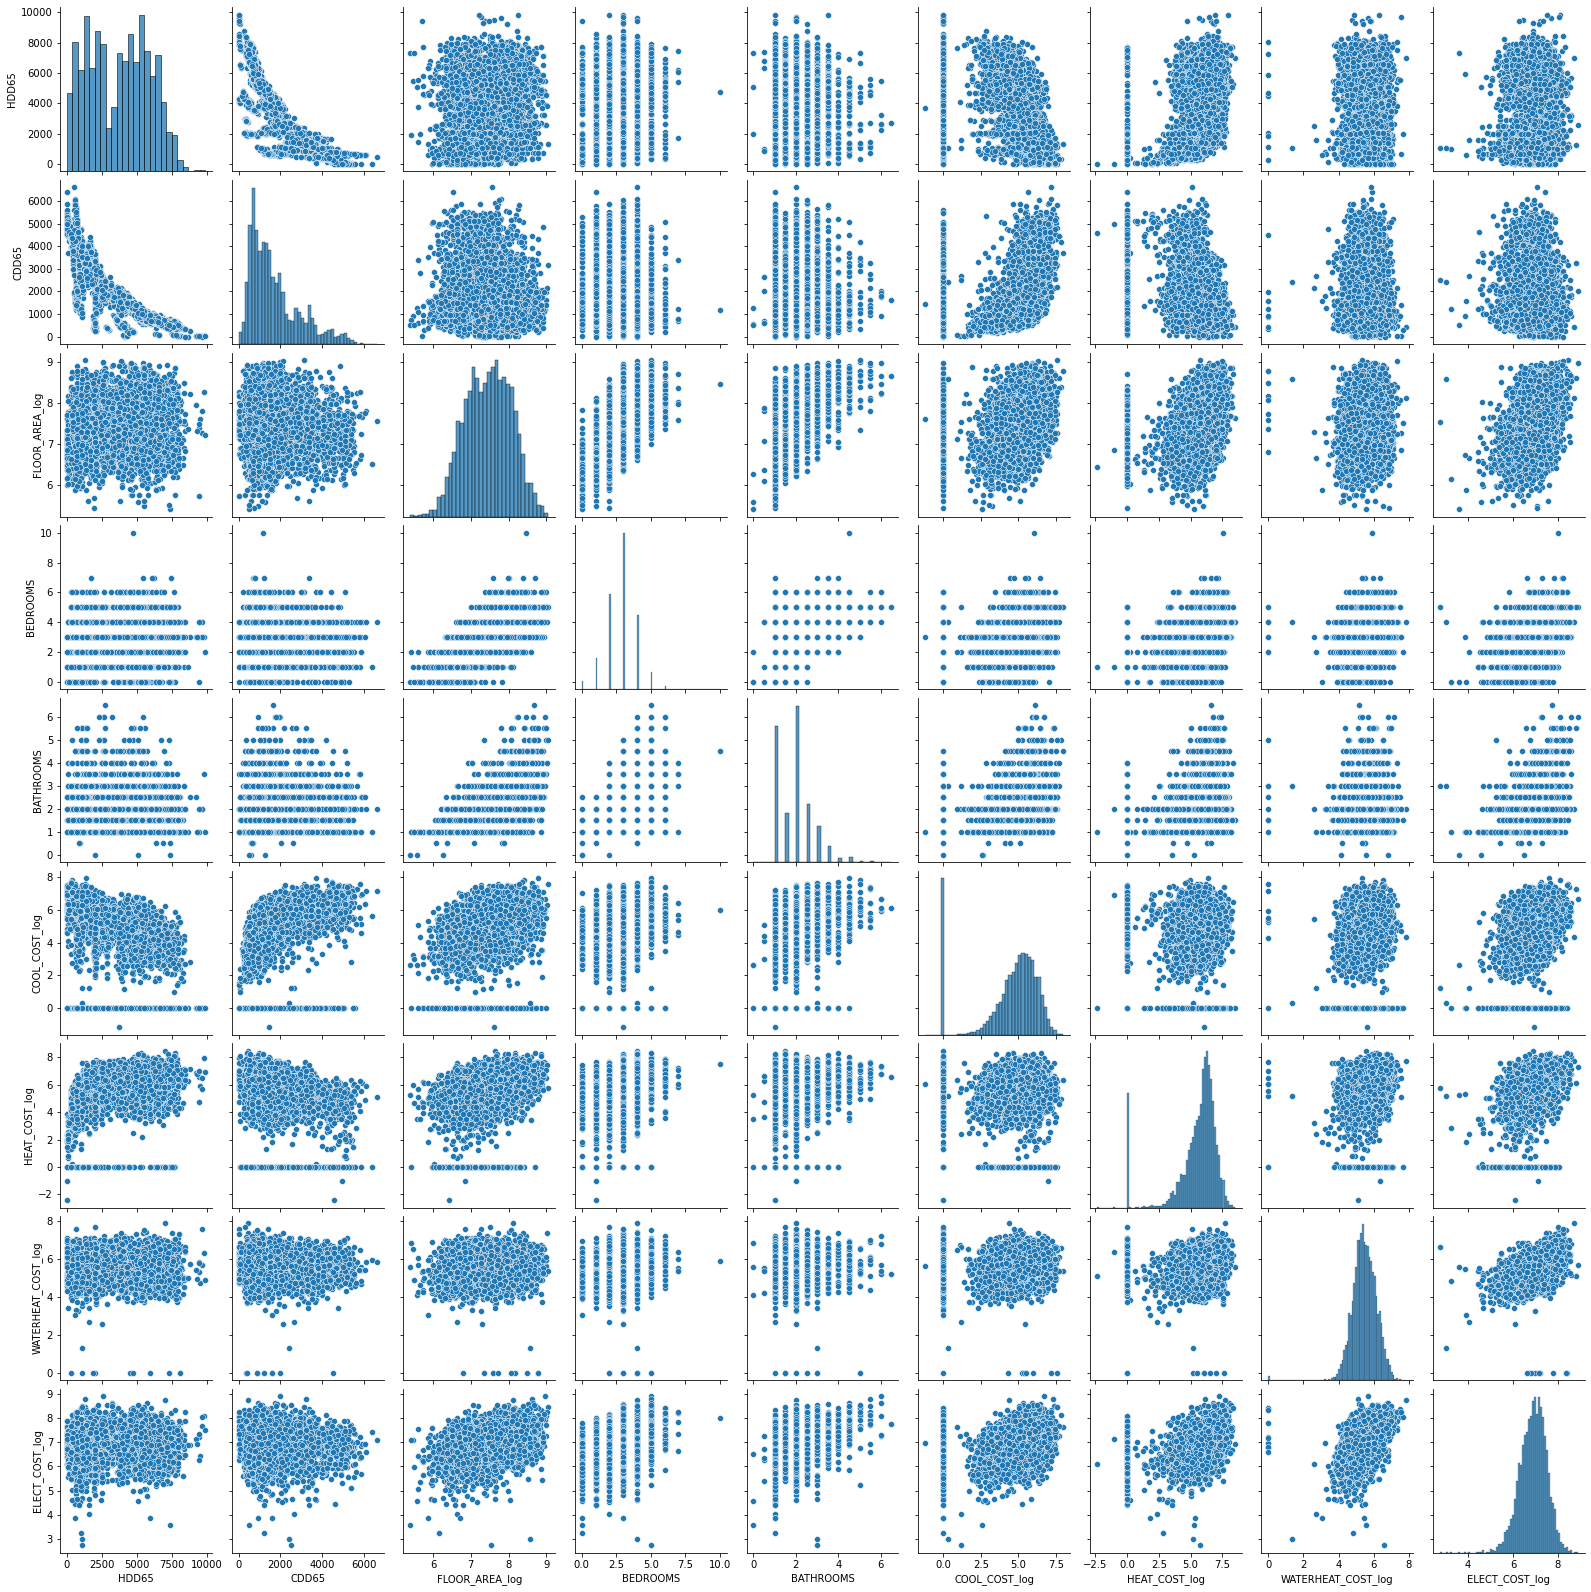

In [7]:
# Visualize a pair plot of numerical variables

sns.pairplot(df_reduced)
plt.show()

It can be observed that:

- **Cost for water heating (WATERHEAT_COST_log)** appears uncorrelated with all other explanatory variables.

- **Total cost for space heating (HEAT_COST_log)** has a moderate positive correlation with number of heating degree days, number of bedrooms, number of bathrooms, and floor area size. It is also negatively correlated to cooling degree days.

- **Total electrical consumption (ELECT_COST_log)** is directly correlated to number of bedrooms, bathrooms, total rooms and floor area size.

- **Total cost for space cooling (COOL_COST_log)** has a positively correlation with cooling degree days, and number of rooms and floor area size, though less than in total cost for space heating.

Correlation coefficients for heating and cooling response variables are expected, since confort temperature in a building is achieved by balancing heating gains and losses through the building envelope with conditioning systems. Thus, it seems logic to observe a positive relationship with Unit Size and Degree Days.

Water heating cost does not appear correlated with any explanatory variable, except very weakly with number of rooms. This could be explained because water consumption is probably driven by the number of household members rather than unit size or climate conditions.

In regards to electricity consumption, it seems reasonable to interpret that the largest is the unit, the higher is the electricity consumption. However, other confounding factors are likely to have a significant impact, such as the installed energy intensity (measured by kW per sqrf), luminosity conditions, household habits, etc.

In general, we see that there is not a particular attribute that strongly correlates with any of the target variables, instead they appear to be driven by many confounding factors. 

In the next cells, the same correlation exploration is conducted but filtered by selected categories: Unit Type, Building Construction Decade, and Climate Regions.

- **Correlation matrix by Unit Type:**

In [8]:
# Visualize unit type values

df.UNIT_TYPE.value_counts()

Detached house                     3752
Apartment in bld with 5+ units      858
Attached house                      479
Apartment in bld with 2-4 units     311
Mobile home                         286
Name: UNIT_TYPE, dtype: int64

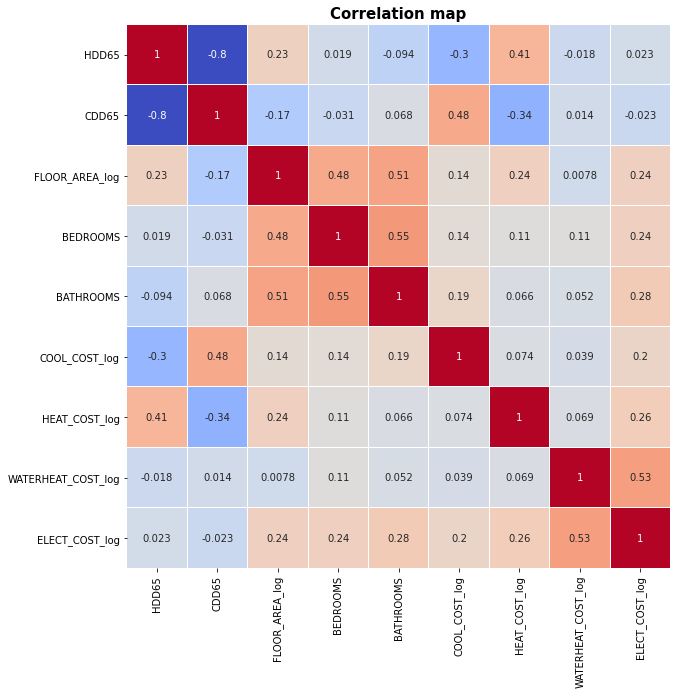

In [9]:
# Select only 'Detached house' type and plot correlation matrix again

df_detached = df_reduced[df_reduced.UNIT_TYPE == 'Detached house']

corr_matrix = df_detached.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

- **Correlation matrix by Decade Built:**

In [10]:
# Visualize year built attribute values and pick the most common

df.DECADE_BUILT.value_counts()

1970-1979    928
2000-2009    901
1980-1989    874
.<1950       858
1990-1999    786
1960-1969    565
1950-1959    544
2010-2015    230
Name: DECADE_BUILT, dtype: int64

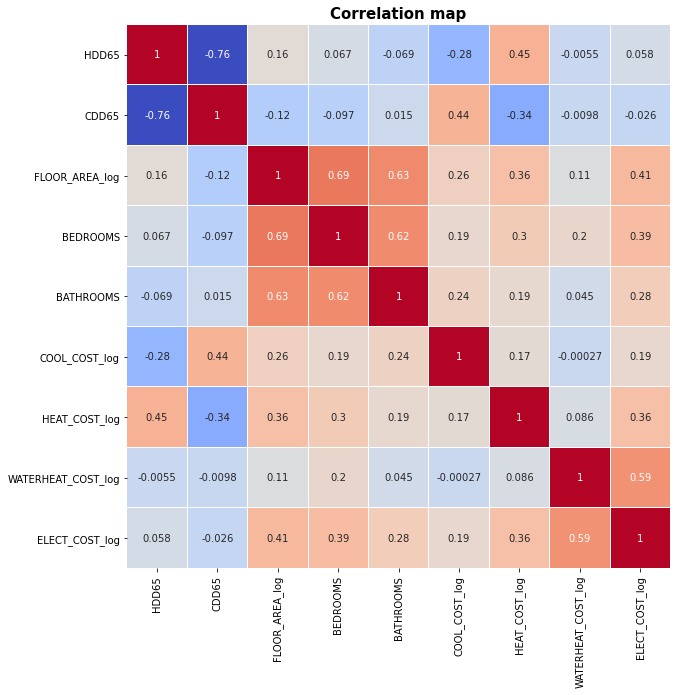

In [11]:
# Select only '1970-1979' decade
df_year = df_reduced[df_reduced.DECADE_BUILT == '1970-1979']

# Plot correlation matrix again
corr_matrix = df_year.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

- **Correlation matrix by Climate Zone:**

In [12]:
# Visualize year built attribute values and pick the most common

df.CLIMATE_REGION.value_counts()

Cold/Very Cold       2008
Mixed-Humid          1468
Hot-Humid            1036
Hot-Dry/Mixed-Dry     750
Marine                424
Name: CLIMATE_REGION, dtype: int64

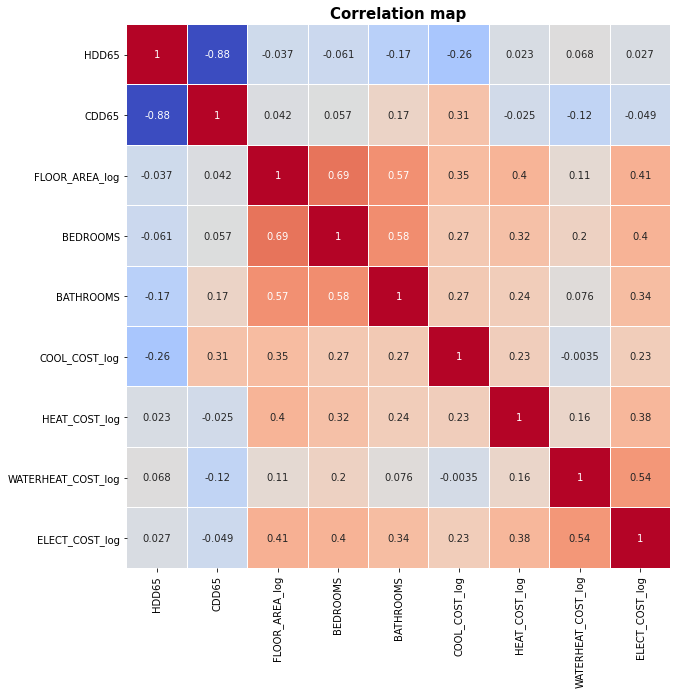

In [13]:
# Select only 'Cold/Very Cold' type
df_clim = df_reduced[df_reduced.CLIMATE_REGION == 'Cold/Very Cold']

# Plot correlation matrix again
corr_matrix = df_clim.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=False, square=True, linewidths=.05)
plt.title('Correlation map', weight='bold').set_fontsize('15')
plt.show()

Interestingly, when filtered by unit types, building age, or climate region, we can see a slight variation in pearson's correlation coefficients but no significant difference. 

Again, none of the target variables has a strong correlation with any other explanatory variable. It seems that consumption costs are not driven by any particular evident attribute, but by an interaction of a number of factors.

Perhaps, the most significant numeric explanatory variable for energy consumption is unit size (FLOOR_AREA_log) and cooling and heating degree days (CDD65 and HDD65 respectively). 

---
### 2.3. Assessment of numeric variables versus target variables

In the next cells, the strongest correlations between target variables and continuous variables seen in the correlation matrix are investigated. 

Some fuctions are created below to visualize regression lines.

In [14]:
# Define functions to fit regression analysis line

def fit_line_lin(var1, var2):
    '''Creates plot object of linear fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 1)
    return plt.plot(var1, fit_line[0] * var1 + fit_line[1], color='red', linewidth=1)

def fit_line_quad(var1, var2):
    '''Creates plot object of quadratic fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 2)
    return plt.plot(var1, fit_line[0] * var1**2 + fit_line[1] * var1 + fit_line[2], color='green', linewidth=2)

def fit_line_cub(var1, var2):
    '''Creates plot object of cubic fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 3)
    return plt.plot(var1, fit_line[0] * var1**3 + fit_line[1] * var1**2 + fit_line[2] * var1 + fit_line[3], color='magenta', linewidth=2)

- **Electricity consumption cost** by **Floor area** and **Number of bedrooms** is depicted in the cell below. 

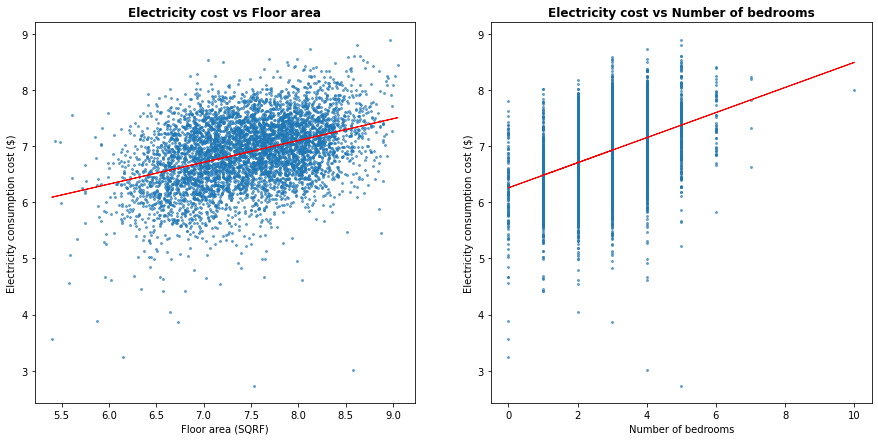

In [15]:
# Create the figure
fig = plt.figure(figsize=(15,7), dpi=72)

# Plot electricity consumption vs floor area
plt.subplot(1,2,1)
plt.scatter(x=df['FLOOR_AREA_log'], y=df['ELECT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Electricity consumption cost ($)')
plt.title('Electricity cost vs Floor area', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df['FLOOR_AREA_log'], df['ELECT_COST_log'])

# Plot electricity consumption vs number of bedrooms
plt.subplot(1,2,2)
plt.scatter(x=df['BEDROOMS'], y=df['ELECT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Number of bedrooms')
plt.ylabel('Electricity consumption cost ($)')
plt.title('Electricity cost vs Number of bedrooms', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df['BEDROOMS'], df['ELECT_COST_log'])

plt.show()

In both cases we can see a mild correlation in which a linear regression line seems to fit reasonably well.

- **Heating cost** by **Floor area** and **Heating degree days**:

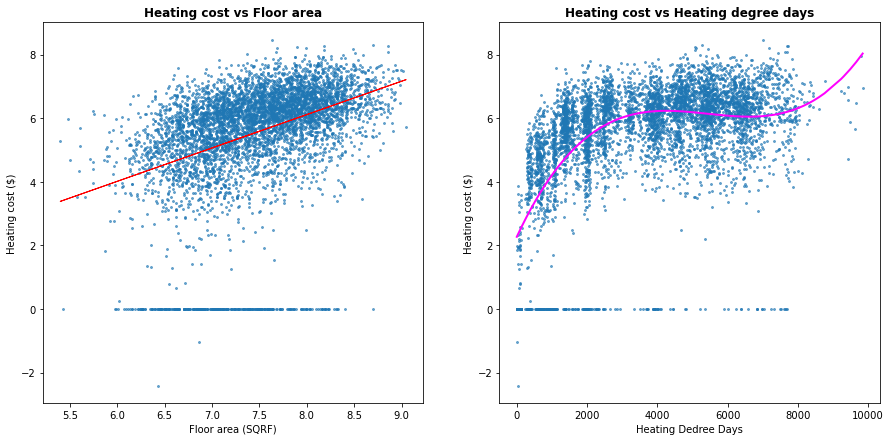

In [16]:
# Create the figure
fig = plt.figure(figsize=(15,7), dpi=72)

# Plot electricity consumption vs floor area
plt.subplot(1,2,1)
plt.scatter(x=df['FLOOR_AREA_log'], y=df['HEAT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Heating cost ($)')
plt.title('Heating cost vs Floor area', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df['FLOOR_AREA_log'], df['HEAT_COST_log'])

# Plot electricity consumption vs number of bedrooms
plt.subplot(1,2,2)
plt.scatter(x=df['HDD65'], y=df['HEAT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Heating Dedree Days')
plt.ylabel('Heating cost ($)')
plt.title('Heating cost vs Heating degree days', weight='bold').set_fontsize('12')

# Plot regression line
df_byHDD = df.sort_values(by='HDD65')
fit_line_cub(df_byHDD['HDD65'], df_byHDD['HEAT_COST_log'])

plt.show()

It can be observed that a linear regression line model fits well between Heating costs and Floor area, whereas in Heating cost versus HDD a third degree polynomy regression model seems more plausible.

Nevertheless, both explanatory variables show weak relationships with the response variable, as already seen in the correlation matrix.

- **Cooling cost** by **Floor area** and **Cooling degree days**:

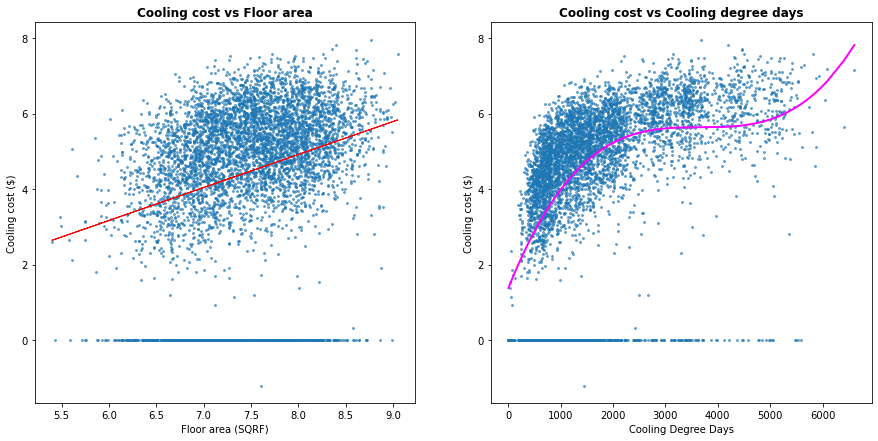

In [17]:
# Create the figure
fig = plt.figure(figsize=(15,7), dpi=72)

# Plot electricity consumption vs floor area
plt.subplot(1,2,1)
plt.scatter(x=df['FLOOR_AREA_log'], y=df['COOL_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Cooling cost ($)')
plt.title('Cooling cost vs Floor area', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df['FLOOR_AREA_log'], df['COOL_COST_log'])

# Plot electricity consumption vs number of bedrooms
plt.subplot(1,2,2)
plt.scatter(x=df['CDD65'], y=df['COOL_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Cooling Degree Days')
plt.ylabel('Cooling cost ($)')
plt.title('Cooling cost vs Cooling degree days', weight='bold').set_fontsize('12')

# Plot regression line
df_byCDD = df.sort_values(by='CDD65')
fit_line_cub(df_byCDD['CDD65'], df_byCDD['COOL_COST_log'])

plt.show()

We can observe the same pattern in Cooling Cost plots than in previous graph (Heating cost). However, it seems that data is more disperse in this case in both graphs.

- **Water heating cost** by **Number of bedrooms** and **Number of bathrooms**:

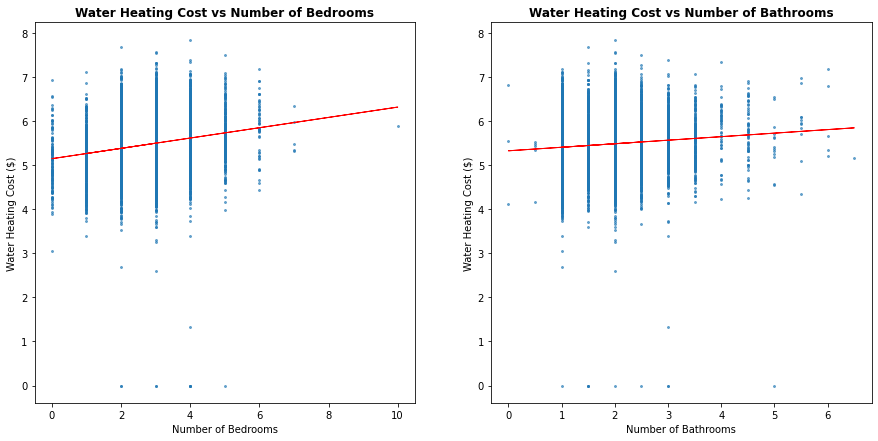

In [18]:
# Create the figure
fig = plt.figure(figsize=(15,7), dpi=72)

# Plot electricity consumption vs floor area
plt.subplot(1,2,1)
plt.scatter(x=df['BEDROOMS'], y=df['WATERHEAT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Water Heating Cost ($)')
plt.title('Water Heating Cost vs Number of Bedrooms', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df['BEDROOMS'], df['WATERHEAT_COST_log'])

# Plot electricity consumption vs number of bedrooms
plt.subplot(1,2,2)
plt.scatter(x=df['BATHROOMS'], y=df['WATERHEAT_COST_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Water Heating Cost ($)')
plt.title('Water Heating Cost vs Number of Bathrooms', weight='bold').set_fontsize('12')

# Plot regression line
#df_byCDD = df.sort_values(by='CDD65')
fit_line_lin(df['BATHROOMS'], df['WATERHEAT_COST_log'])

plt.show()

Water heating costs are harly explained by these two explanatory variables. A linear regression model seems reasonable but cannot explain variations in the data.

---
### 2.4. Assessment of categorical variables versus target variables

In this section, target variables are plotted against different categorical variables to assess the relationship between them.

- **Energy consumption cost against Unit Type:**

In [19]:
# Set visual style for plots

plt.style.use('seaborn')

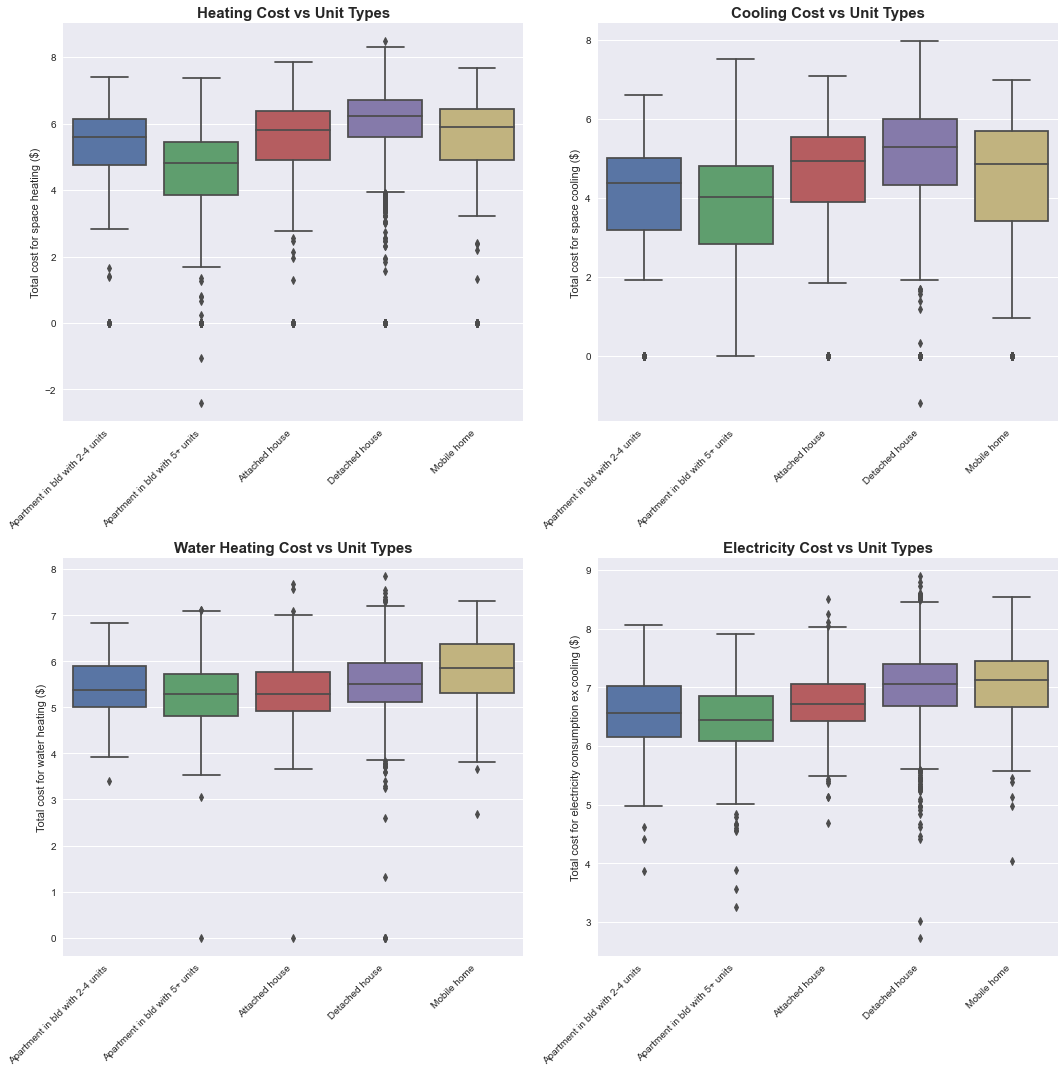

In [20]:
# Create four subplots 

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
sns.boxplot(x='UNIT_TYPE', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(x='UNIT_TYPE', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3)
sns.boxplot(x='UNIT_TYPE', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water Heating Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4)
sns.boxplot(x='UNIT_TYPE', y='ELECT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Electricity Cost vs Unit Types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

- Heating and cooling costs are generaly higher in detached houses and lower in multi-unit buildings
- Water consumption cost is higher in mobile homes, this might be due to the source of energy used to heat the water: electricity is less efficient for this purpose.

- **Energy consumption cost against Climate regions:** 

    Also, a map showing International Energy Conservation Code (IECC) climate regions is displayed as well for reference.

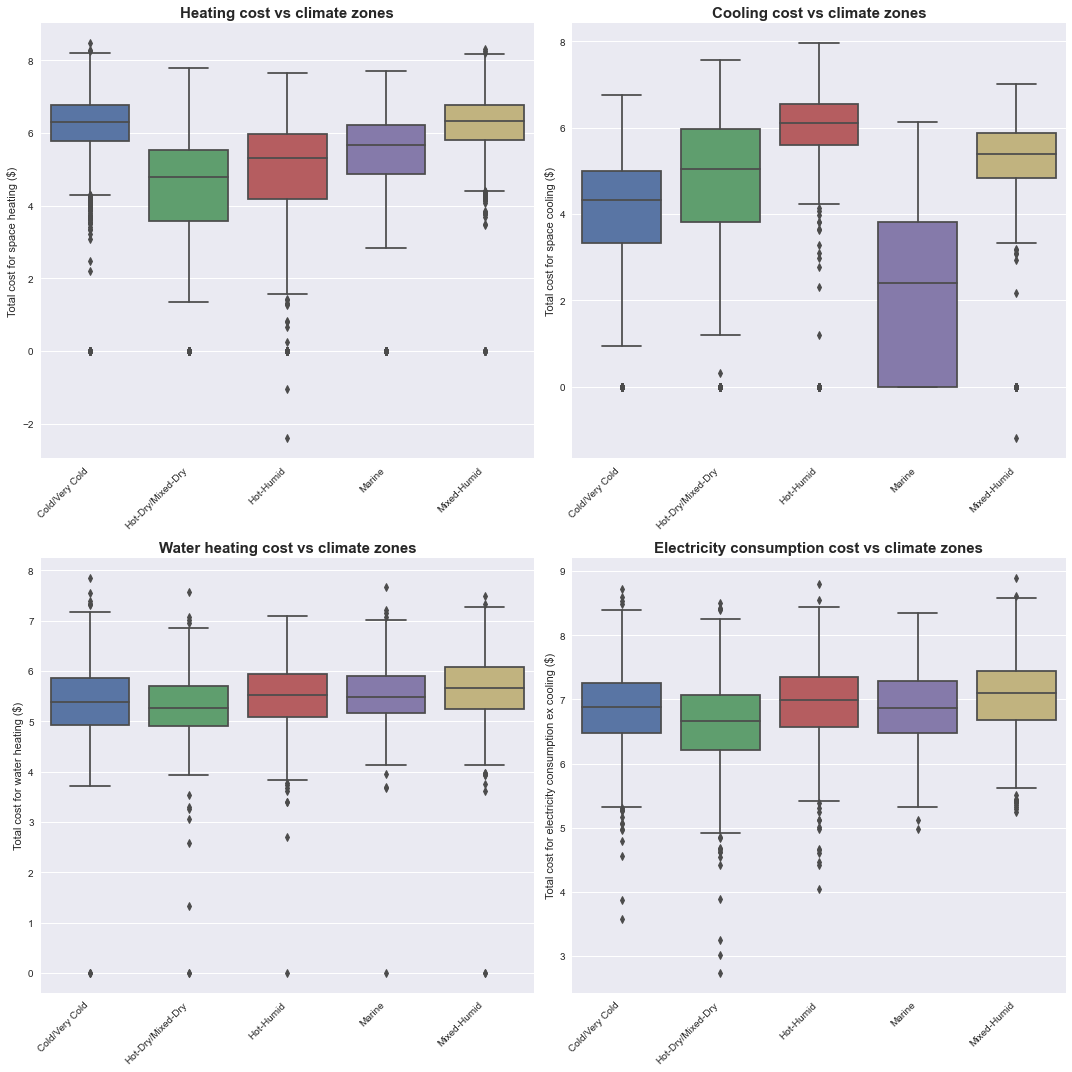

In [21]:
# Create four subplots 

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
sns.boxplot(x='CLIMATE_REGION', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(x='CLIMATE_REGION', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3)
sns.boxplot(x='CLIMATE_REGION', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water heating cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4)
sns.boxplot(x='CLIMATE_REGION', y='ELECT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Electricity consumption cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

![Title](img/BuildingAmerica_ClimateMap.jpg "Building America climate zone map")

As expected, we can observe large differences in heating and cooling costs by climate conditions. However, there is not a significant difference when it comes to water heating or electricity costs.

- **Consumption costs against Building Construction Decade:** 

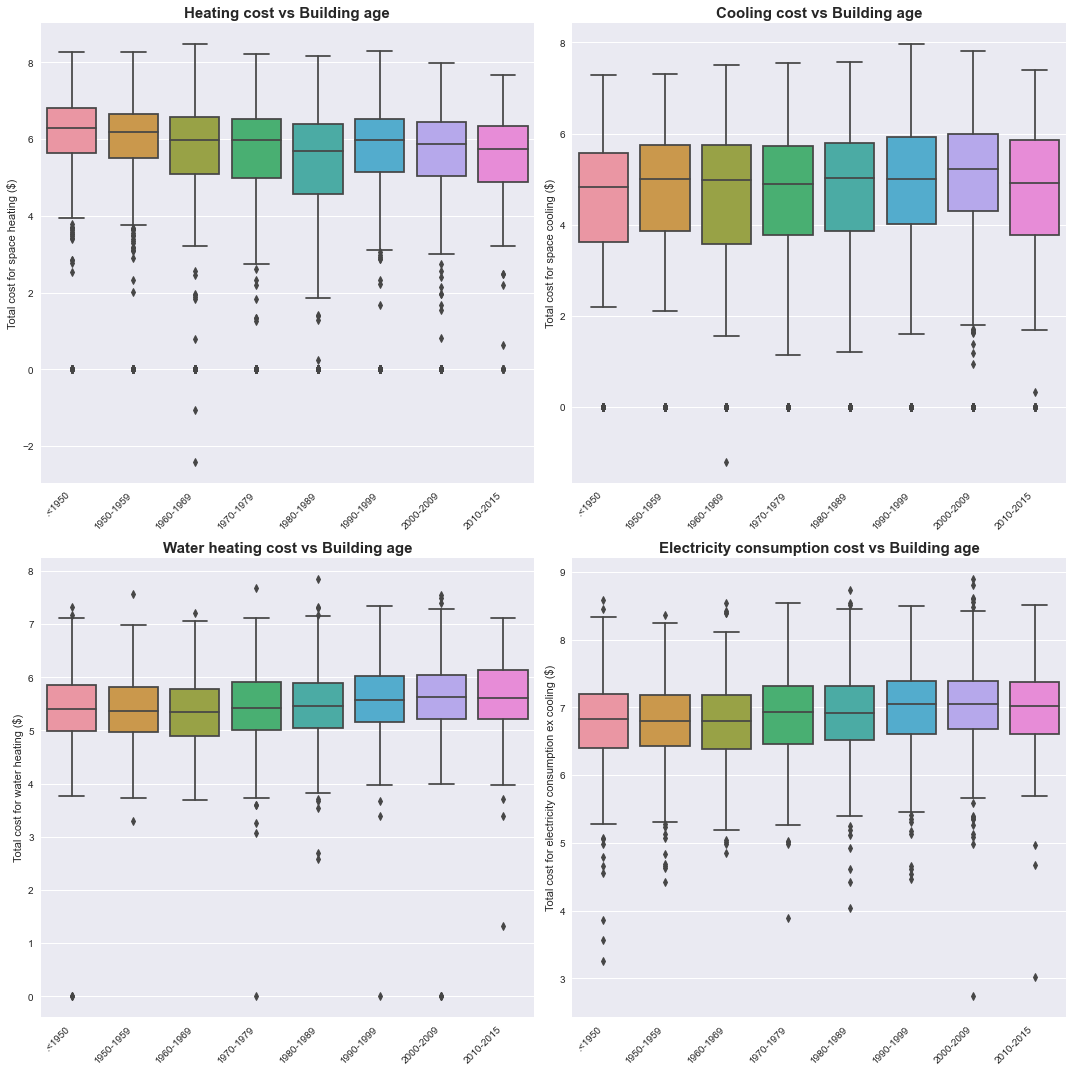

In [22]:
# Create four subplots 

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
sns.boxplot(x='DECADE_BUILT', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(x='DECADE_BUILT', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3)
sns.boxplot(x='DECADE_BUILT', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water heating cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4)
sns.boxplot(x='DECADE_BUILT', y='ELECT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Electricity consumption cost vs Building age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

It can be seen a slight downward trend in heating cost towards more modern buildings, whereas the opposite is true for cooling, water heating and electricity costs.

This may be explained by the fact that modern homes and buildings are better insulated, but have more energy density. i.e. more  electrical appliances.

- **Heating and cooling cost by equipment age**:

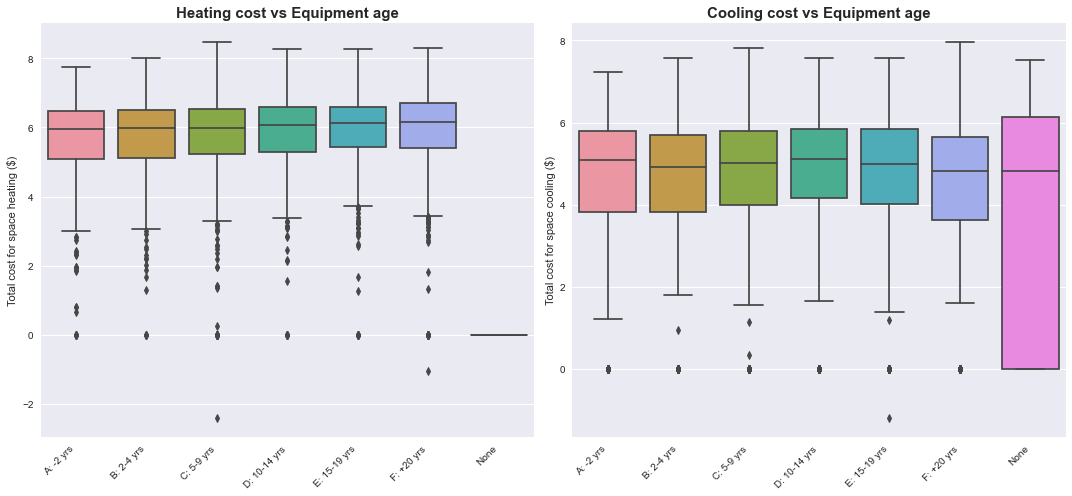

In [23]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='EQUIP_AGE', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Equipment age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(1,2,2)
sns.boxplot(x='EQUIP_AGE', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Equipment age', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

It can be seen that the older is the home system, the higher is the heating cost. However, this is not the same when it comes to cooling costs: they are relative flat or even decreases with equipments older than 20 years.

- **Heating and cooling costs by Equipment type**

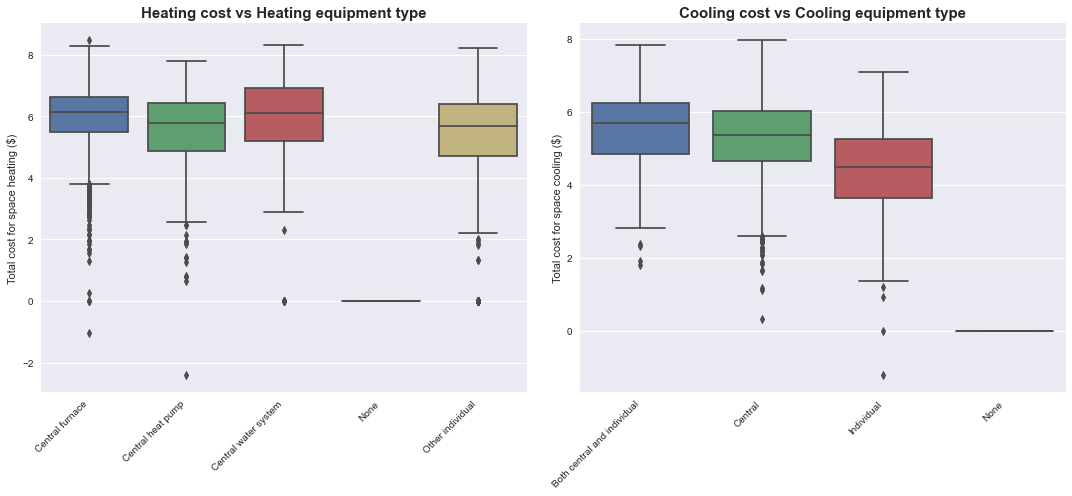

In [24]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='HEAT_TYPE', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Heating equipment type', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2)
sns.boxplot(x='COOL_TYPE', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Cooling equipment type', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

- Units with central water heating systems and central furnace systems consume more than others with central heat pumps or individual heating systems.
- Cooling cost is higher in units central or central and individual units.

- **Heating and cooling cost by High ceiling**:

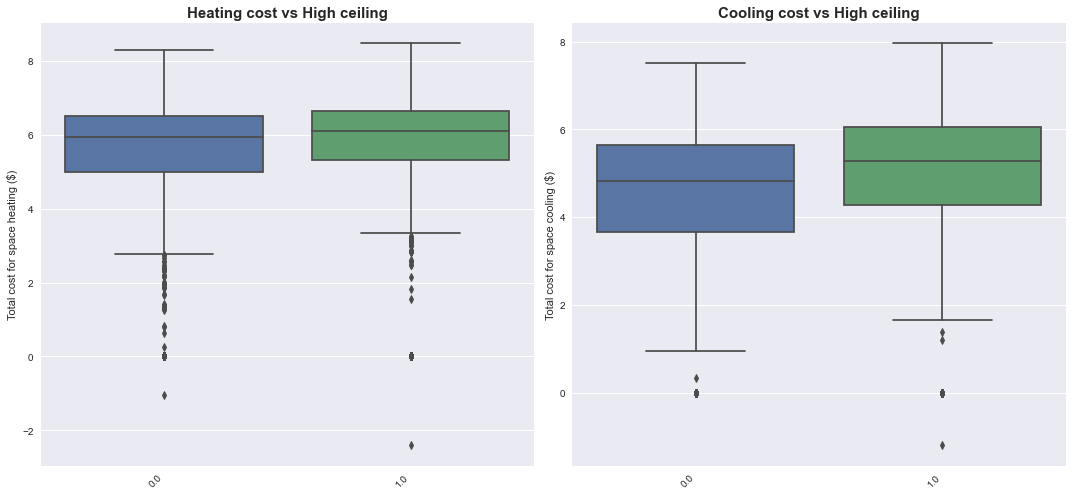

In [25]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='HIGH_CEIL', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs High ceiling', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2)
sns.boxplot(x='HIGH_CEIL', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs High ceiling', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

Units with high ceilings have higher energy consumption costs than those without. This was expected since a higher ceiling means larger conditioned air volume.

- **Heating and cooling cost by attic and/or basement in unit**:

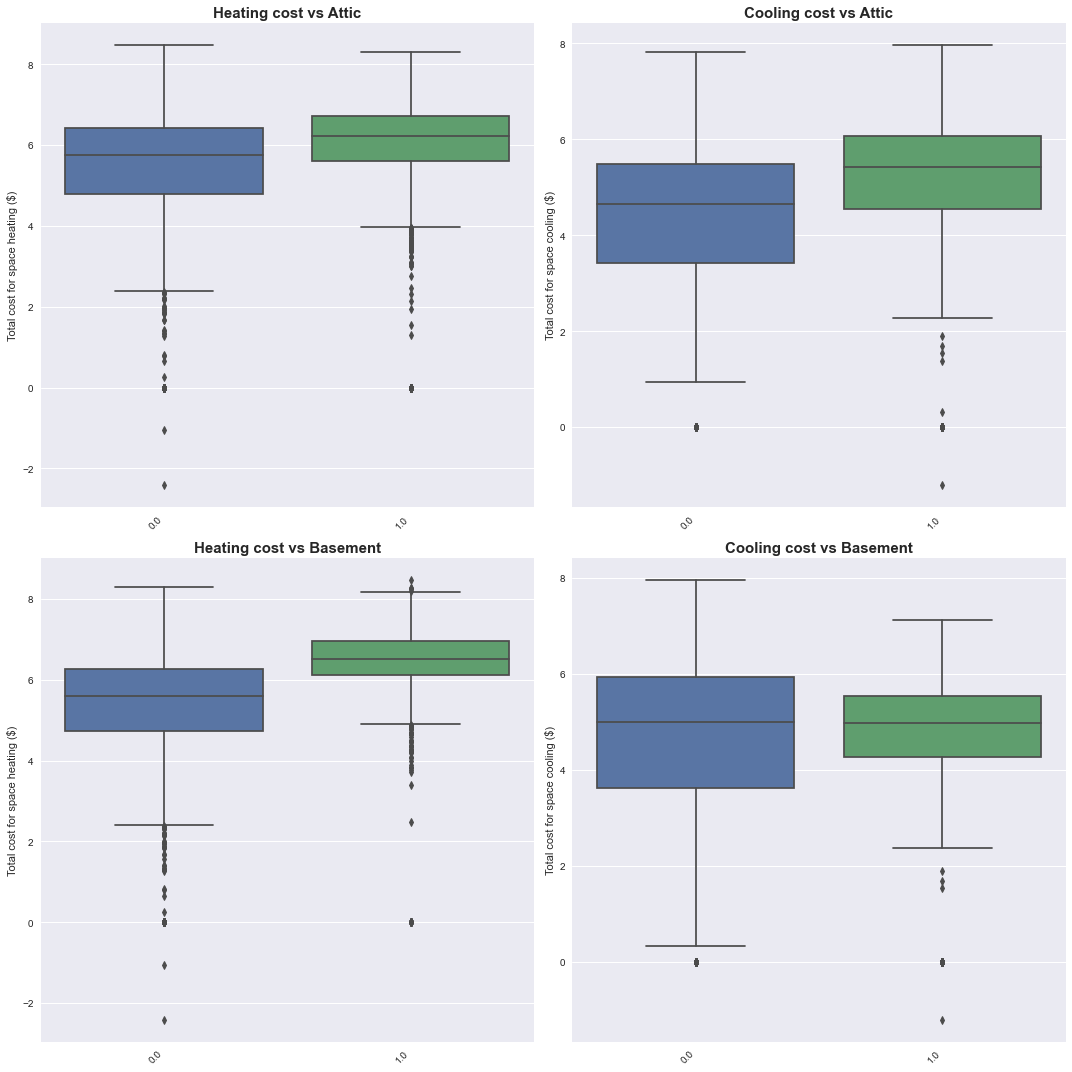

In [26]:
# Creates the figure
fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
sns.boxplot(x='ATTIC', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Attic', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(x='ATTIC', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Attic', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3)
sns.boxplot(x='BASEMENT', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Basement', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,4)
sns.boxplot(x='BASEMENT', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Basement', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

We can see that existence of attic in the unit accounts for higher heating and cooling costs, whereas existence of basement in the unit is correlated with higher heating costs but not cooling costs.

- **Energy consumption costs by unit ownership**:

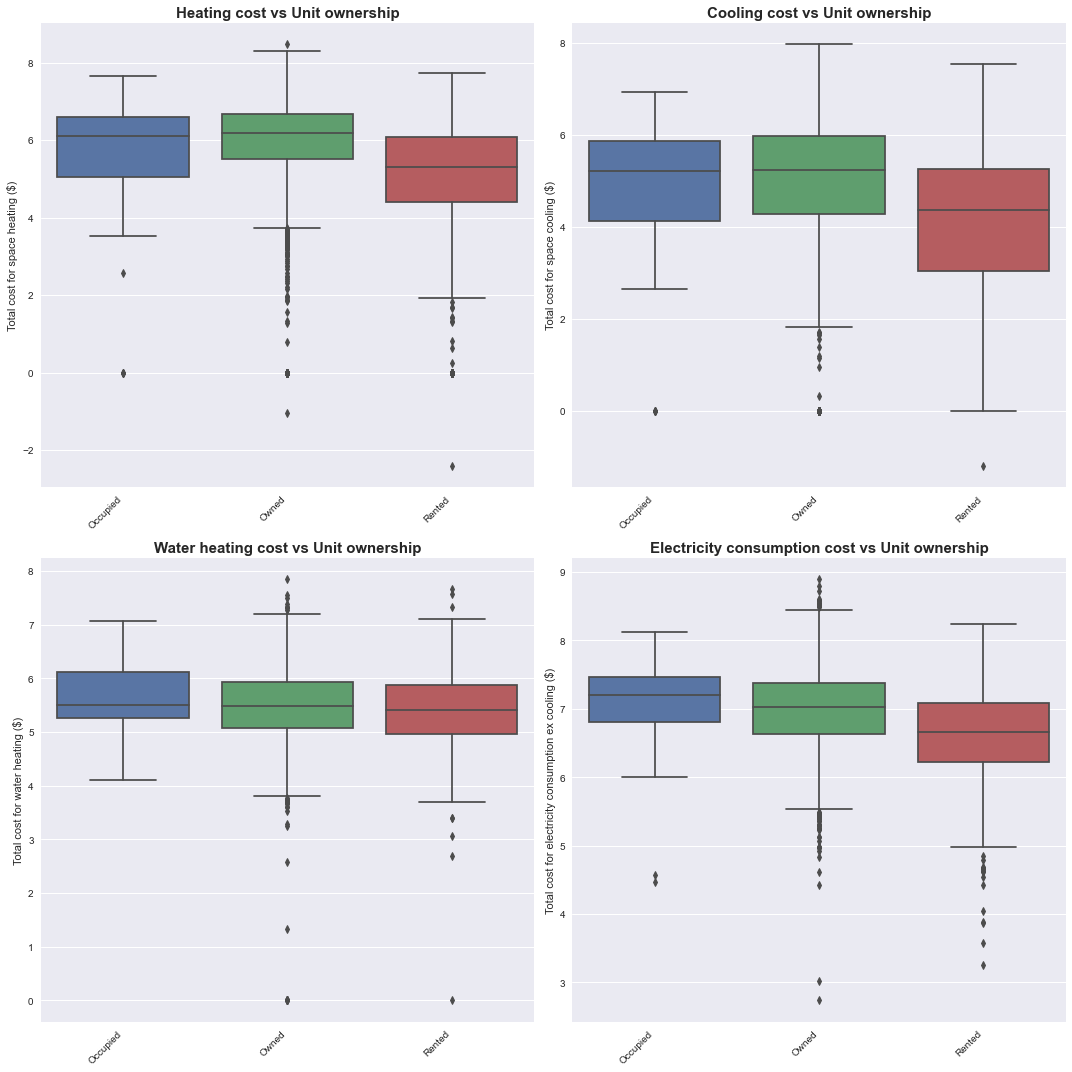

In [27]:
# Create four subplots 

fig = plt.figure(figsize=(15,15), dpi=72)

plt.subplot(2,2,1)
sns.boxplot(x='OWNERSHIP', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(x='OWNERSHIP', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.subplot(2,2,3)
sns.boxplot(x='OWNERSHIP', y='WATERHEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Water heating cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for water heating ($)')
plt.xlabel('')

plt.subplot(2,2,4)
sns.boxplot(x='OWNERSHIP', y='ELECT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Electricity consumption cost vs Unit ownership', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for electricity consumption ex cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

In general, rental units have lower consumption bills than occupied by owner. Probably this is due to co-payments agreement between the lessor and the lessee.

- **Heating and cooling costs by number of stories**

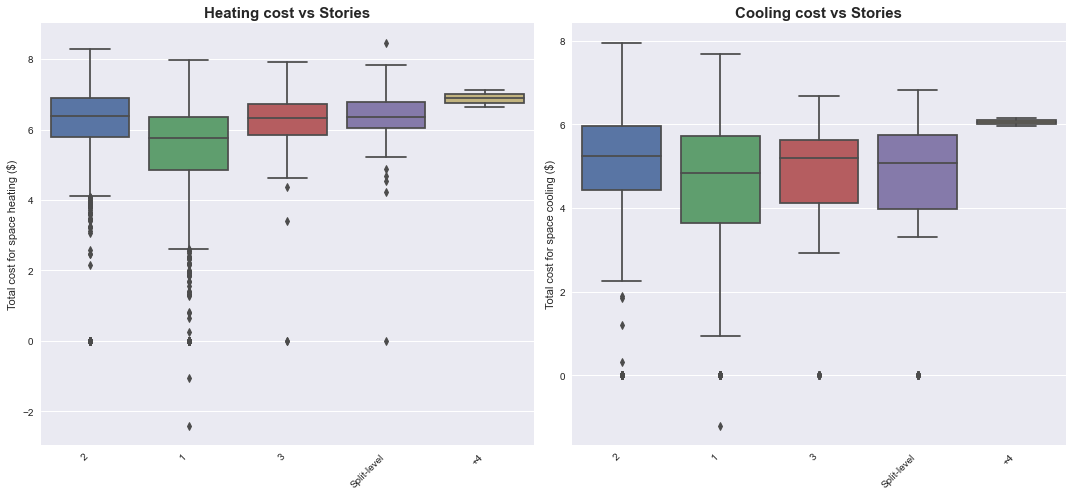

In [28]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='STORIES', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Stories', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2)
sns.boxplot(x='STORIES', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Stories', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

We can observe that one story units seems more energy efficient that multi-storie units. There is not a significant difference between 2 and 3 stories.

- **Heating and cooling costs by programmable thermostat:** 

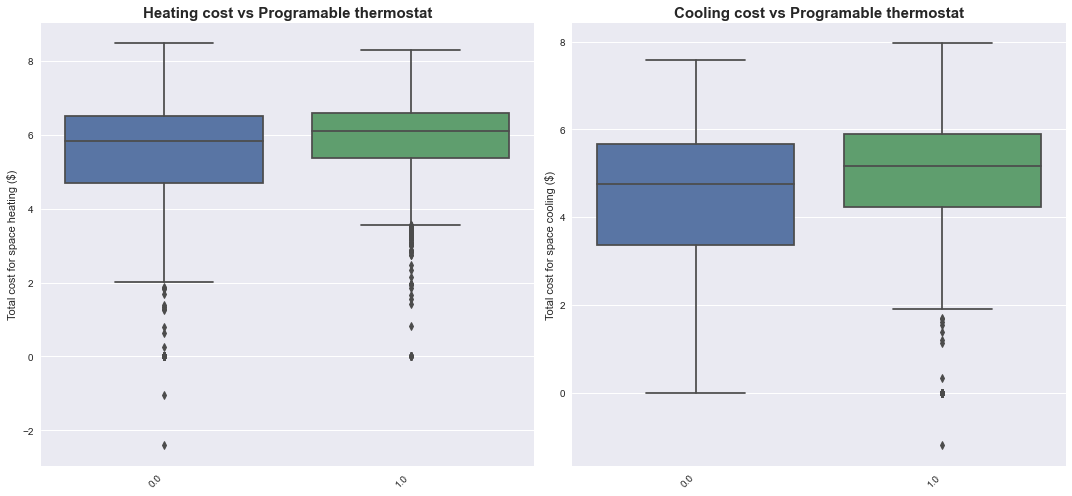

In [29]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='THERMOSTAT', y='HEAT_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs Programable thermostat', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2)
sns.boxplot(x='THERMOSTAT', y='COOL_COST_log', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs Programable thermostat', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

Surprisingly, having a programable thermostat is correlated with higher heating and cooling cost. One plausible explanation for this would be the misuse of the thermostat or its incorrect setting. 